## TASK 3 - Iris Dataset - Finding optimal number of clusters using KMeans (Clustering) algorithm (unsupervised algorithm).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sb

In [3]:
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
original = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
original.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
original.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [9]:
original.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
original.shape

(150, 4)

### Check for data types of each feature in the dataset

In [11]:
original.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

### Check for missing values in the dataset

In [12]:
original.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Check for categorical attributes in the dataset

In [13]:
s = (original.dtypes == 'object')
object_cols = list(s[s].index)
print("categorical attributes")
print(object_cols)

categorical attributes
[]


### Visuzalize the data distribution graphically using hist() method

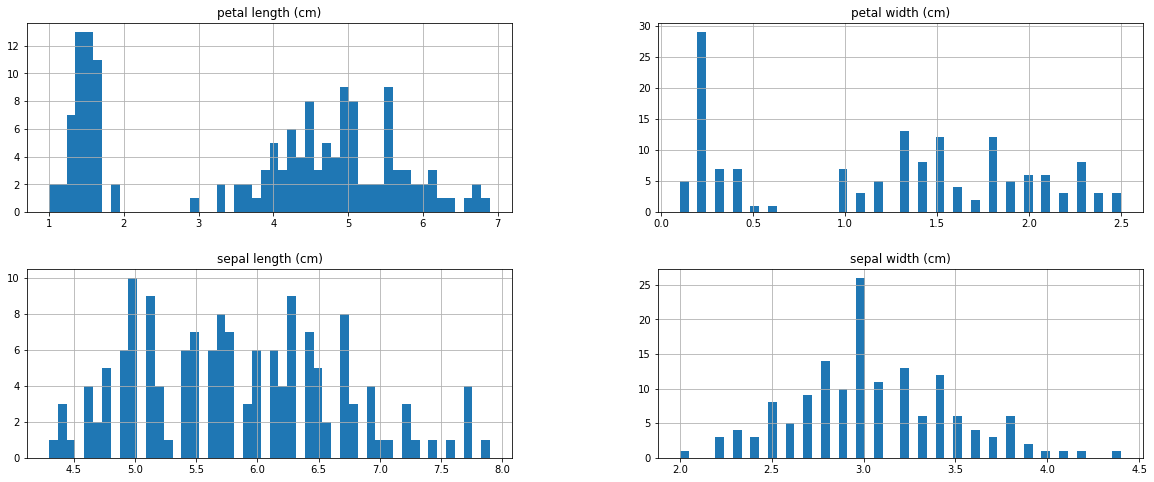

In [14]:
original.hist(bins = 50, figsize=(20,8))
plt.show()

In [15]:
original['petal length (cm)'].value_counts()

1.5    13
1.4    13
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: petal length (cm), dtype: int64

In [16]:
original['petal width (cm)'].value_counts()

0.2    29
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
2.0     6
2.1     6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal width (cm), dtype: int64

In [17]:
original['sepal length (cm)'].value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal length (cm), dtype: int64

In [18]:
original['sepal width (cm)'].value_counts()

3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     4
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: sepal width (cm), dtype: int64

### Visualize the correlated attributes graphically

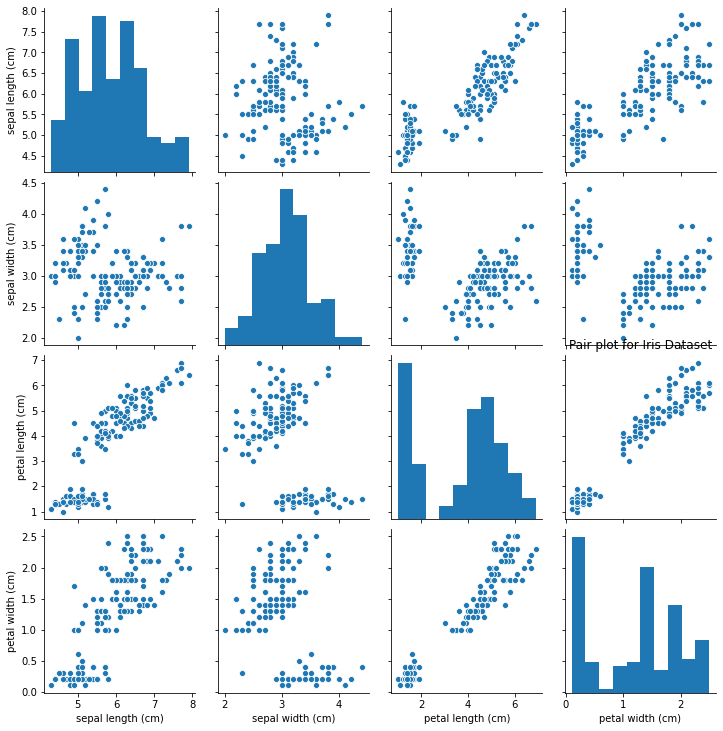

In [19]:
sb.pairplot(original)
plt.title("Pair plot for Iris Dataset", fontsize = 12)
plt.show()

In [20]:
x = original.iloc[:, [0, 1, 2, 3]].values
x.shape

(150, 4)

### Apply Unsupervised learning algorithm - KMeans algorithm

In [21]:
inertia = []
for n in range (1,11):
    algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300, random_state=42))
    algorithm.fit(x)
    cluster_assign = algorithm.labels_
    inertia.append(algorithm.inertia_)

### Plot the Inertia score against Number of Clusters to find the optimal number of clusters for our dataset called Elbow Method

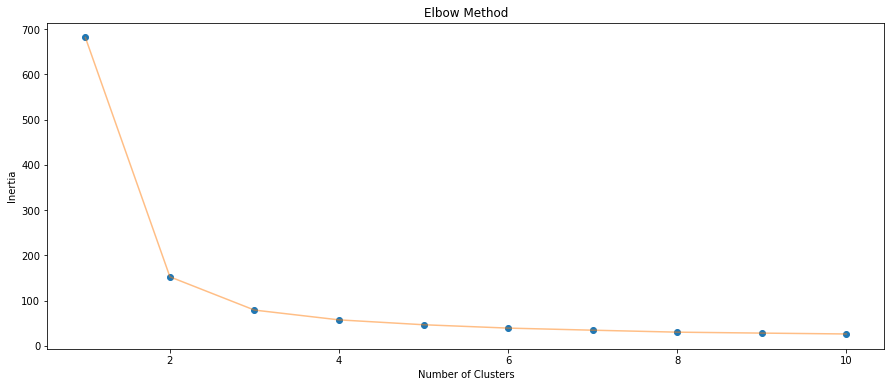

In [22]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.title("Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Based on the elbow method, it looks like k=3 clusters is the optimal number of clusters for analysis.

In [23]:
kmeans_alg = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)
kmeans_fit = kmeans_alg.fit_predict(x)
labels1 = kmeans_alg.labels_
centroids1 = kmeans_alg.cluster_centers_

In [24]:
three_clusters = original.copy()
three_clusters['Cluster'] = labels1
three_clusters.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


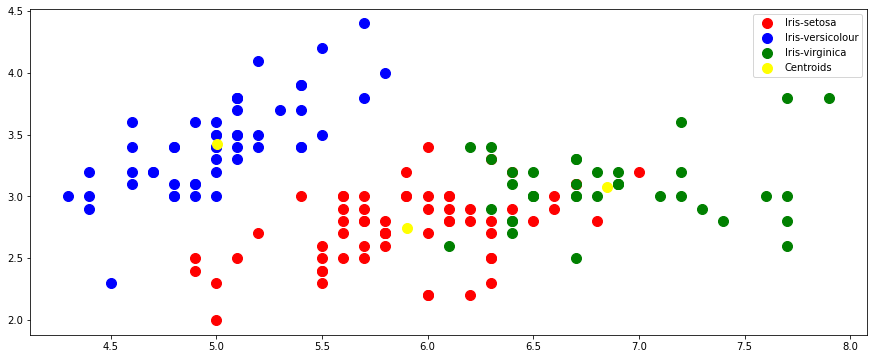

In [25]:
# Visualising the clusters - On the first two columns
plt.figure(1 , figsize = (15 ,6))
plt.scatter(x[kmeans_fit == 0, 0], x[kmeans_fit == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmeans_fit == 1, 0], x[kmeans_fit == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmeans_fit == 2, 0], x[kmeans_fit == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans_alg.cluster_centers_[:, 0], kmeans_alg.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()